<a href="https://colab.research.google.com/github/pranava-25/Codsoft/blob/main/CreditCard_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [63]:
def load_data(path):
    df = pd.read_csv("/content/file.csv")
    return df

In [64]:


print(df.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [65]:
def preprocess_data(df):
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce', dayfirst=True)
    df['dob'] = pd.to_datetime(df['dob'], errors='coerce', dayfirst=True)
    df['age'] = (pd.Timestamp("now") - df['dob']).dt.days // 365
    df['hour'] = df['trans_date_trans_time'].dt.hour
    df['day'] = df['trans_date_trans_time'].dt.day
    df['month'] = df['trans_date_trans_time'].dt.month
    df.drop(columns=['Unnamed: 0','cc_num','first','last','street','city','state','zip','dob','trans_num','trans_date_trans_time'], inplace=True)
    for col in ['gender', 'category', 'job', 'merchant']:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    return df

In [57]:
def train_model(df):
    X = df.drop('is_fraud', axis=1)
    y = df['is_fraud']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    return model, X_test, y_test, y_pred, y_proba, df.drop('is_fraud', axis=1).columns, model.feature_importances_

In [72]:
def train_model(df):
    X = df.drop('is_fraud', axis=1)
    y = df['is_fraud']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    return model, X_test, y_test, y_pred, y_proba, df.drop('is_fraud', axis=1).columns, model.feature_importances_

In [67]:
def plot_conf_matrix(y_test, y_pred):
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [68]:
def plot_feature_importance(feature_names, importance):
    sorted_idx = np.argsort(importance)[::-1]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance[sorted_idx], y=feature_names[sorted_idx])
    plt.title("Feature Importance")
    plt.show()

In [69]:
def plot_roc_curve(y_test, y_proba):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

Data loaded successfully.
Data preprocessing complete.
Training model...

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    319278
           1       0.96      0.84      0.90      1581

    accuracy                           1.00    320859
   macro avg       0.98      0.92      0.95    320859
weighted avg       1.00      1.00      1.00    320859



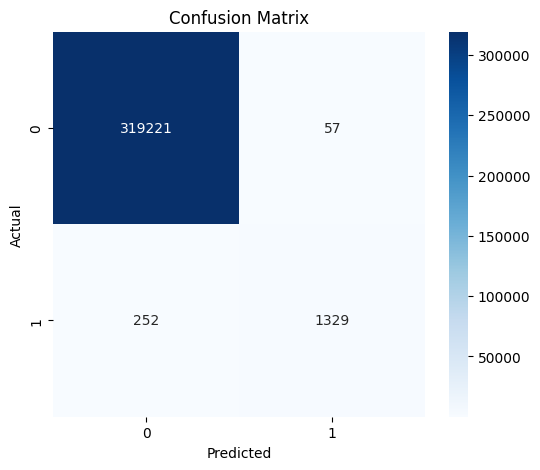

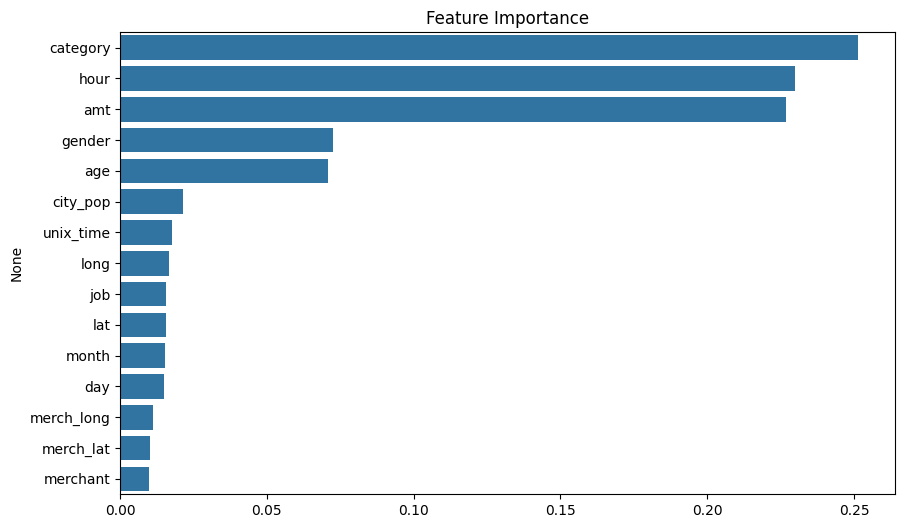

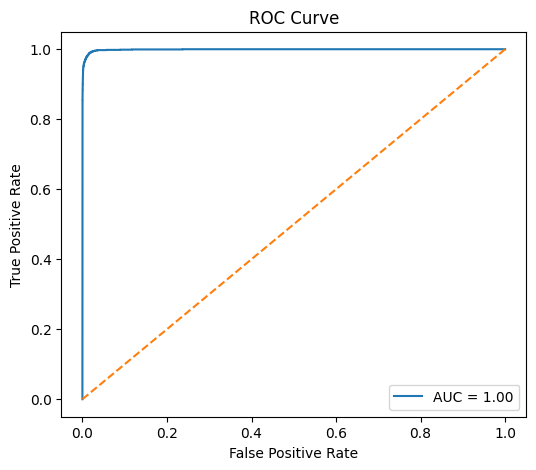

In [73]:
if __name__ == "__main__":
    df = load_data("/content/file.csv")
    print("Data loaded successfully.")

    df = preprocess_data(df)
    print("Data preprocessing complete.")
    print("Training model...")

    model, X_test, y_test, y_pred, y_proba, feature_names, importance = train_model(df)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    plot_conf_matrix(y_test, y_pred)
    plot_feature_importance(feature_names, importance)
    plot_roc_curve(y_test, y_proba)